# Project for exam

#### Importing libraries
I imported the fundamental libraries for data analysis:

>• <font color='green'>pandas</font>: for data manipulation and analysis; <br>
>•  <font color='green'>numpy</font>: for mathematical operations and array manipulation; <br>
>• <font color='green'>matplotlib.pyplot</font>: for graphical data visualization; <br>
>• <font color='green'>scipy.stats.norm</font>: for working with statistical distributions. 


In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

#### Loading the dataset
•I loaded the CSV dataset called loan_approval.csv into a DF DataFrame. <br>
•I used the info() method to display general information about the dataset, such as: <br>
>• Number of columns and rows. <br>
>• Data types. <br>
>• Null values present <br>

In [42]:
DF = pd.read_csv('loan_approval.csv') 
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


#### Removing a column
I removed the first column that was about the index of the DF that we used to generate the file 'loan_approval.csv' because it is not relevant to the analysis

In [43]:
DF.drop(columns=['loan_id'],inplace=True)

#### Re-inspecting the dataset
After deleting the loan_id column, I called the info() method to verify the changes.

In [44]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


#### Viewing available columns
I printed the names of all the columns in the dataset to have a clear summary of the variables that can be analyzed.

In [45]:
print("Columns available in the dataset:\n", DF.columns)

Columns available in the dataset:
 Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


#### Data reduction
From the original DF DataFrame I selected six key columns: <br>
• two <font color='green'>categorical</font>: <br>
>-education <br>
>-loan_status <br>

• four <font color='green'>numeric</font>: <br>
>-income_annum <br>
>-loan_amount <br>
>-cibil_score <br>
>-bank_asset_value <br>

This data reduction simplifies the analysis by focusing only on the variables that I considered most relevant for the analysis.

In [46]:
df =DF[[' education',' income_annum', ' loan_amount', ' cibil_score', ' bank_asset_value', ' loan_status' ]]

#### Cleanup column names
I removed any extra spaces in column names to avoid problems when referencing or manipulating them.

In [47]:
df.columns= df.columns.str.strip()

In [48]:
print("Columns available in the dataset:\n", df.columns)

Columns available in the dataset:
 Index(['education', 'income_annum', 'loan_amount', 'cibil_score',
       'bank_asset_value', 'loan_status'],
      dtype='object')


#### Detailed inspection of the dataset
I checked the dataset structure again to confirm that: <br>
• All records are complete (no missing values). <br>
• Data types are consistent with columns. <br>

We note that: <br>
-there are 4269 records in the table; <br>
-no columns have 'NA' values <br>
-all Dtypes are correct

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   education         4269 non-null   object
 1   income_annum      4269 non-null   int64 
 2   loan_amount       4269 non-null   int64 
 3   cibil_score       4269 non-null   int64 
 4   bank_asset_value  4269 non-null   int64 
 5   loan_status       4269 non-null   object
dtypes: int64(4), object(2)
memory usage: 200.2+ KB


#### Checking data integrity
• I performed an explicit check for null values in each column using isnull().sum(). <br>
• Although the .info() method already confirmed that there were no missing values, I add a more specific check.

In [50]:
print("Missing values in each column:\n", df.isnull().sum())
print("No columns have 'NA' values")

Missing values in each column:
 education           0
income_annum        0
loan_amount         0
cibil_score         0
bank_asset_value    0
loan_status         0
dtype: int64
No columns have 'NA' values


#### Checking for Duplicates

• The code identifies and displays duplicate records in the dataset. <br>
• df.duplicated() returns a Boolean Series with True for duplicate rows. <br>


In [51]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
4264    False
4265    False
4266    False
4267    False
4268    False
Length: 4269, dtype: bool


In [52]:
print(df.duplicated().to_string())
print('There are no duplicates')

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

#### Statistical summary for numeric attributes:
The code returns a statistical summary of the numeric columns, with information such as: <br>
• Mean, standard deviation, minimum and maximum values, percentiles.

In [53]:
df.describe()

,income_annum,loan_amount,cibil_score,bank_asset_value
count,4.269000e+03,4.269000e+03,4269.000000,4.269000e+03
mean,5.059124e+06,1.513345e+07,599.936051,4.976692e+06
std,2.806840e+06,9.043363e+06,172.430401,3.250185e+06
min,2.000000e+05,3.000000e+05,300.000000,0.000000e+00
25%,2.700000e+06,7.700000e+06,453.000000,2.300000e+06
50%,5.100000e+06,1.450000e+07,600.000000,4.600000e+06
75%,7.500000e+06,2.150000e+07,748.000000,7.100000e+06
max,9.900000e+06,3.950000e+07,900.000000,1.470000e+07


#### Boxplot of a single numeric attribute
This line creates a boxplot of the income_annum column in the df DataFrame. <br> 
A boxplot is useful for visualizing data distribution, quartiles, median, outliers, and variability of a variable.

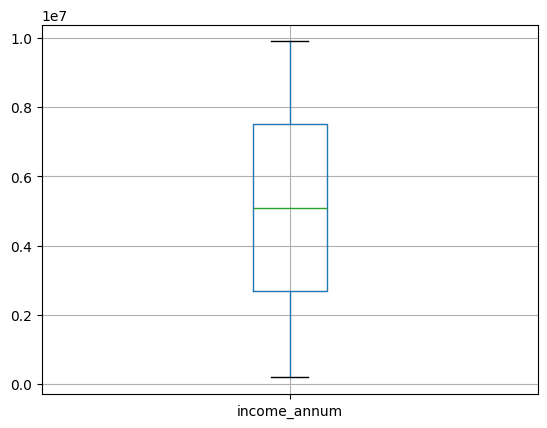

In [54]:
df.boxplot(column=['income_annum'])
plt.show()

#### Box plot creation with matplotlib

matplotlib qt is a *magic command* in Jupyter Notebook that allows you to display plots in a separate interactive window, rather than in the notebook itself. The qt option launches an interactive graphics window. This is useful when you want smoother interaction with your plots, such as zooming or panning. <br>

Since the plotting operation was performed after activating %matplotlib q`, the plot will be displayed in a separate, interactive window.

In [55]:
%matplotlib qt
df.boxplot(column=['income_annum'])


<Axes: >

%matplotlib inline is another *magic command* in Jupyter Notebook, but unlike %matplotlib qt, it causes plots to be displayed directly in the notebook, under the code cell that generated them. In other words, it is the default way to display plots within the notebook itself, without opening a separate window.

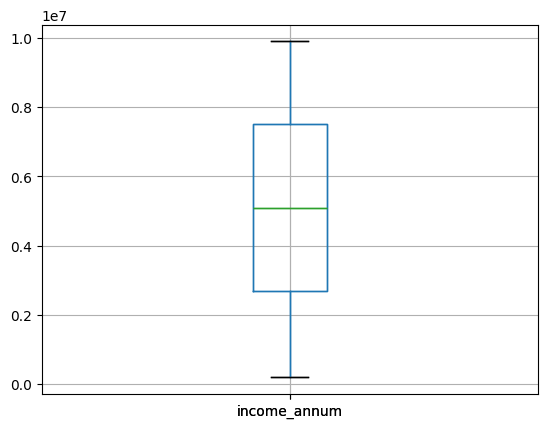

In [56]:
%matplotlib inline
df.boxplot(column=['income_annum'])
plt.show()

#### Boxplot of numerical attributes over the whole dataset:
The code creates a figure with multiple plots (in the form of *subplots*). Each *subplot* contains a boxplot for a different column of the df DataFrame.

<Axes: >

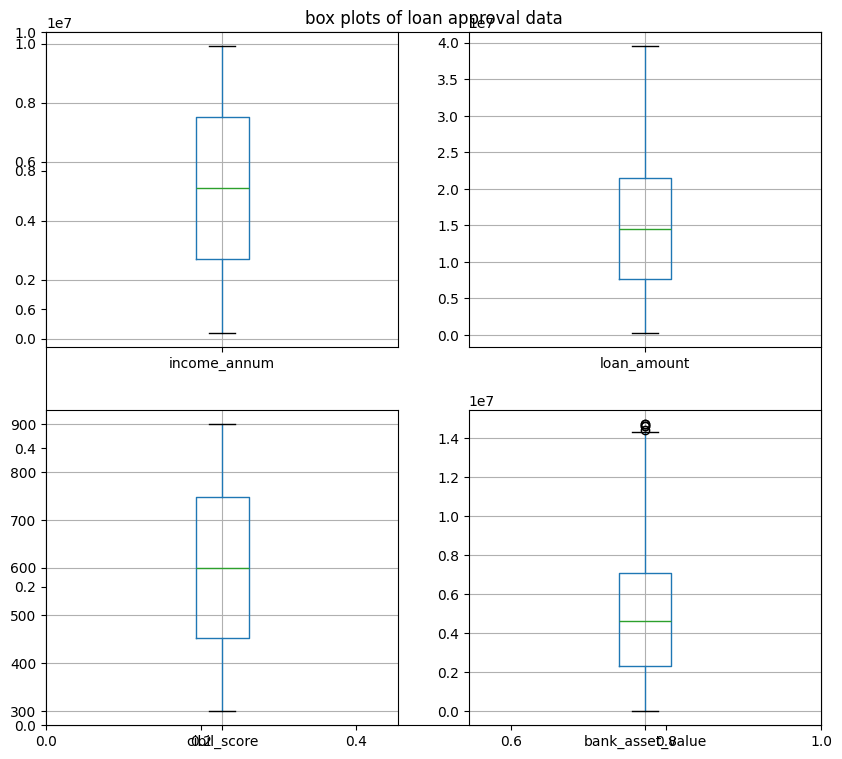

In [58]:
plt.figure(figsize=(10, 9))
plt.title('box plots of loan approval data')

plt.subplot(2,2,1)
df.boxplot(column=['income_annum'])

plt.subplot(2,2,2)
df.boxplot(column=['loan_amount'])

plt.subplot(2,2,3)
df.boxplot(column=['cibil_score'])

plt.subplot(2,2,4)
df.boxplot(column=['bank_asset_value'])



#### Density plot for the numerical attributes:
The code creates a figure with 4 subcharts, each containing a density plot for one of the following columns of the DataFrame df:<br>
-income_annum <br>
-loan_amount <br>
-cibil_score <br>
-bank_asset_value <br>

Density plots are useful for understanding the continuous distribution of each variable, showing where the values are concentrated or if there are multiple peaks. In general, density plots provide a smoother representation than histograms and are useful for observing trends or patterns in the data.

<Axes: ylabel='Density'>

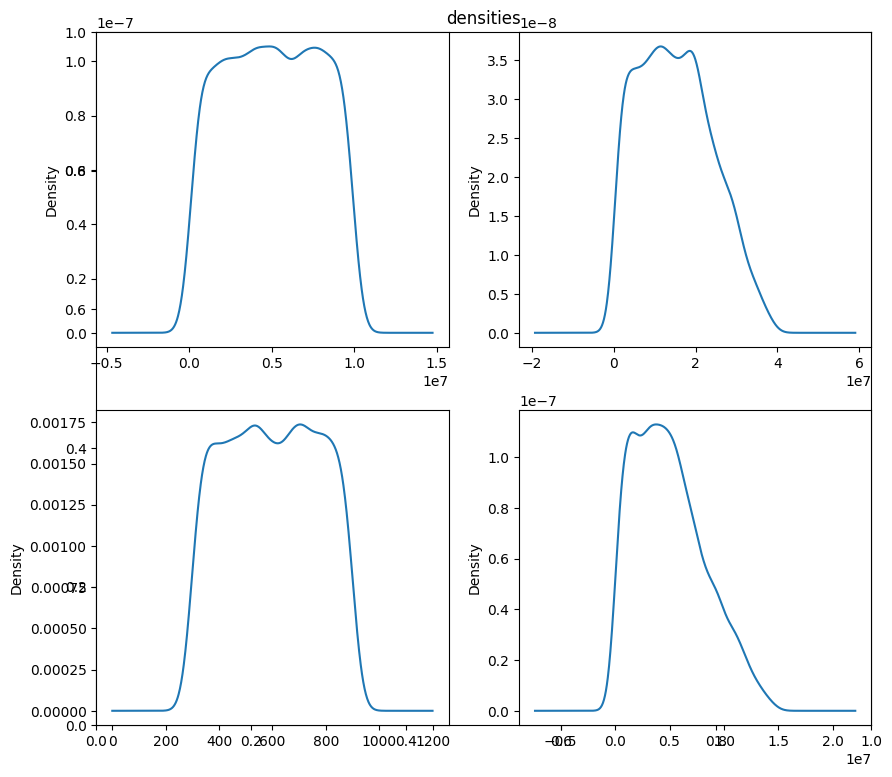

In [59]:

plt.figure(figsize=(10, 9))
plt.title('densities')

plt.subplot(2,2,1)
df.income_annum.plot.density()

plt.subplot(2,2,2)
df.loan_amount.plot.density()

plt.subplot(2,2,3)
df.cibil_score.plot.density()

plt.subplot(2,2,4)
df.bank_asset_value.plot.density()

#### Histograms plot for the numerical attributes:
The code creates a figure with multiple histograms to visualize the distribution of numeric variables in the DataFrame df.

Histograms are useful visual tools for understanding the distribution of data, showing how values are distributed in different categories or intervals (called bins).

<Axes: >

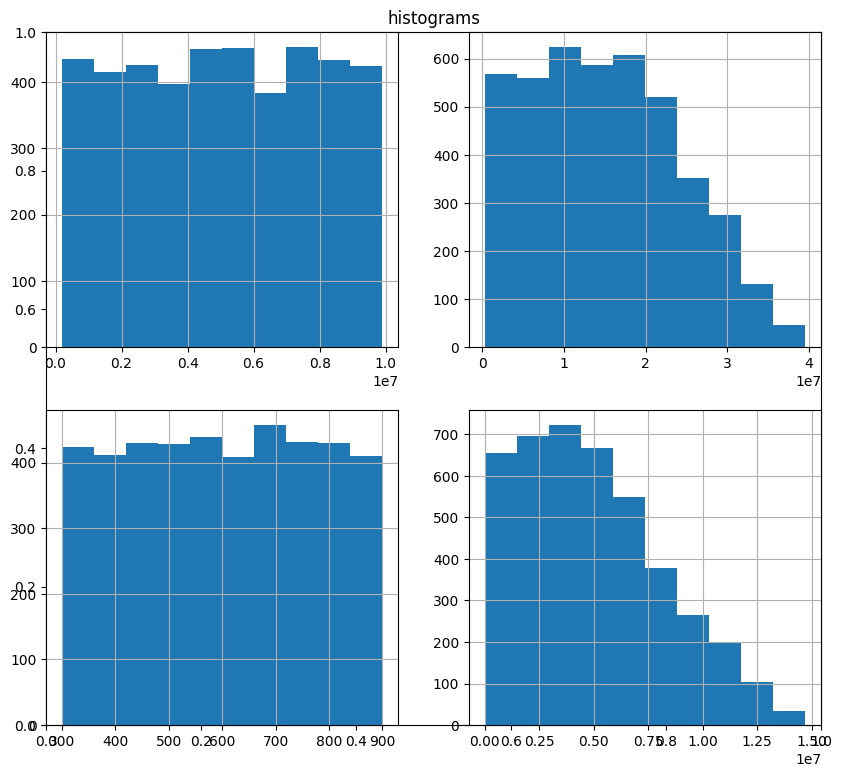

In [60]:
plt.figure(figsize=(10, 9))
plt.title('histograms')

plt.subplot(2,2,1)
df.income_annum.hist()

plt.subplot(2,2,2)
df.loan_amount.hist()

plt.subplot(2,2,3)
df.cibil_score.hist()

plt.subplot(2,2,4)
df.bank_asset_value.hist()


#### Statistical summary for cathegorial attributes:
The code is used to calculate statistics for categorical variables, such as: <br>
• Count of unique values.  <br>
• Frequency of the most common value.

In [61]:
categorical_attributes = df.select_dtypes(include=['object', 'category'])
print('Statistical summary for cathegorial attributes:\n', categorical_attributes.describe())

Statistical summary for cathegorial attributes:
         education loan_status
count        4269        4269
unique          2           2
top      Graduate    Approved
freq         2144        2656


#### Pie chart for cathegorial attributes:
The code creates a pie chart that displays the distribution of different categories of the education column in the DataFrame df. <br>
Then another pie chart is created for the loan_status column. <br>
Pie charts are useful for showing the proportion of each category to the total.

([<matplotlib.patches.Wedge at 0x1c3f846d190>,
 [Text(-0.007690248230928327, 1.0999731178906813, ' Graduate'),
  Text(0.007690475520649968, -1.099973116301606, ' Not Graduate')])

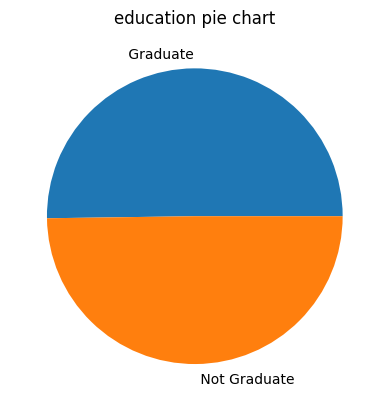

In [62]:

plt.figure()
plt.title('education pie chart')

counting = df.education.value_counts()

plt.pie(counting, labels=counting.index)


([<matplotlib.patches.Wedge at 0x1c3f846f080>,
 [Text(-0.41186725769241783, 1.0199830204669722, ' Approved'),
  Text(0.4118671036792618, -1.0199830826571863, ' Rejected')])

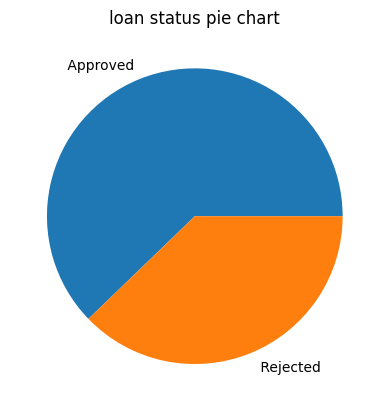

In [63]:
plt.figure()
plt.title('loan status pie chart')

counting_2 = df.loan_status.value_counts()

plt.pie(counting_2, labels=counting_2.index)


#### Creating new uniform classes
The code splits the numeric variable income_annum into 4 uniform classes, creates a new column called other_classes to represent these classes, and then counts the frequency of each class. <br>
Discretization is a useful technique for transforming continuous numeric variables into categorical variables, making it easier to analyze or visualize data.

In [64]:
new_classes= pd.cut(df.income_annum,4,labels=['L','M','H','XH'])

df['other_classes']=new_classes
df['other_classes'].value_counts()

C:\Users\franc\AppData\Local\Temp\ipykernel_20336\2604738457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['other_classes']=new_classes


other_classes
XH    1092
L     1067
M     1057
H     1053
Name: count, dtype: int64

In [65]:
print("Columns available in the dataset:\n", df.columns)

Columns available in the dataset:
 Index(['education', 'income_annum', 'loan_amount', 'cibil_score',
       'bank_asset_value', 'loan_status', 'other_classes'],
      dtype='object')


#### Crosstab production
The code creates crosstables to analyze the relationship between categorical variables. In particular, for each categorical variable (education and loan_status), the cross-distribution is calculated with the new categorical variable other_classes that was created previously (from the discretization of income_annum).

In [66]:
crosstab_education = pd.crosstab(df['education'], ['other_classes'])

crosstab_loan_status = pd.crosstab(df['loan_status'], ['other_classes'])

print(crosstab_education)
print(crosstab_loan_status)


col_0         other_classes
education                  
Graduate               2144
Not Graduate           2125
col_0        other_classes
loan_status               
Approved              2656
Rejected              1613


#### Boxplot of a numeric attribute by a categorical variable
I chose a numeric attribute A and a categorical attribute B and produced, in a unique diagram, the boxplots of A restricted to each category in B. <br>
It is useful for comparing the distribution of income_annum between different education categories.

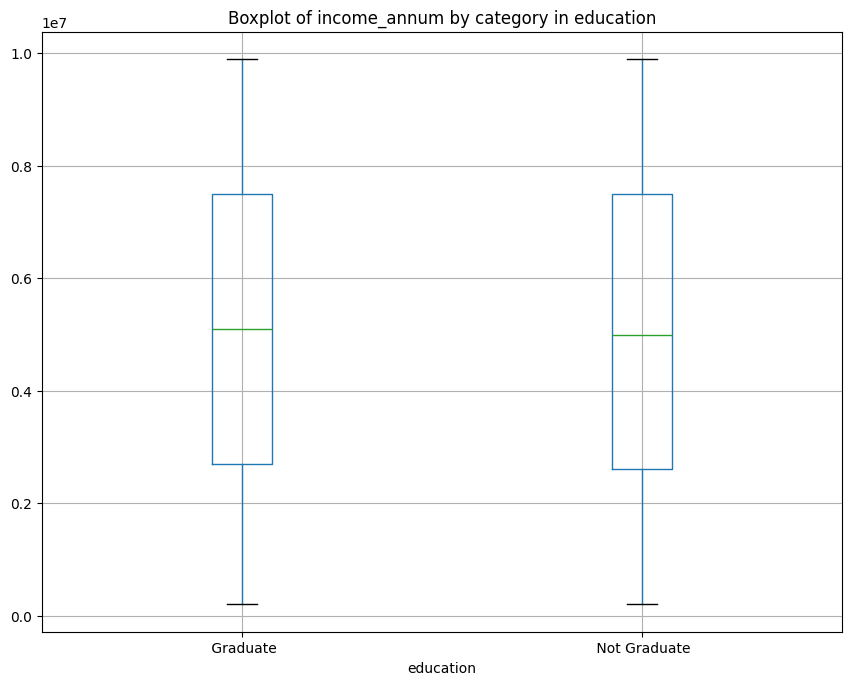

In [67]:
A = 'income_annum'  
B = 'education' 
df.boxplot(column=A, by=B, figsize=(10, 8))
plt.title(f'Boxplot of {A} by category in {B}')
plt.suptitle('')
plt.show()

#### Statistics grouped by category
I checked the income_annuum values for the two education categories. <br>
This is used to calculate the descriptive statistics of income_annum grouped by education categories.

In [68]:
print(df.groupby('education')['income_annum'].describe())


               count          mean           std       min        25%  \
education                                                               
Graduate      2144.0  5.091604e+06  2.801239e+06  200000.0  2700000.0   
Not Graduate  2125.0  5.026353e+06  2.812759e+06  200000.0  2600000.0   

                    50%        75%        max  
education                                      
Graduate      5100000.0  7500000.0  9900000.0  
Not Graduate  5000000.0  7500000.0  9900000.0  


#### Standardization of a numeric attribute
I chose a numeric attribute and produced a new attribute by standardizing its range

Standardization of a numerical attribute is a process that transforms a numerical variable so that it has a mean of 0 and a standard deviation of 1. This is done by subtracting the variable's mean value and dividing the result by the variable's standard deviation. The goal of standardization is to make data comparable on a common scale, which is especially useful when variables have different units of measurement or values ​​that are far apart.

In [69]:
numeric_attribute='loan_amount'
df.loc[:, 'Standardized'] = (df[numeric_attribute] - df[numeric_attribute].mean()) / df[numeric_attribute].std()


C:\Users\franc\AppData\Local\Temp\ipykernel_20336\767555844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Standardized'] = (df[numeric_attribute] - df[numeric_attribute].mean()) / df[numeric_attribute].std()


In [70]:
print("Columns available in the dataset:\n", df.columns)

Columns available in the dataset:
 Index(['education', 'income_annum', 'loan_amount', 'cibil_score',
       'bank_asset_value', 'loan_status', 'other_classes', 'Standardized'],
      dtype='object')


#### Pearson Correlation
I found the Pearson correlation indices between all the numeric attributes:

Pearson correlation is used to identify whether two variables are positively or negatively correlated and to quantify how strong this relationship is. It is a number between -1 and 1 that measures this relationship: <br>
>• <font color='green'>1 indicates a perfect positive correlation</font>: when one variable increases, the other increases proportionally. <br>
>• <font color='green'>-1 indicates a perfect negative correlation</font>: when one variable increases, the other decreases proportionally. <br>
>• <font color='green'>0 indicates no linear correlation</font>: the variables are not linearly correlated. <br>

-Values between 0 and 1 (positive) indicate a positive correlation (the higher the value, the stronger the relationship).  <br>
-Values between -1 and 0 (negative) indicate a negative correlation (the lower the value, the stronger the inverse relationship).

In [71]:
Pearson_correlation_indeces= df[['income_annum','loan_amount','cibil_score','bank_asset_value']].corr()
print(Pearson_correlation_indeces)

                  income_annum  loan_amount  cibil_score  bank_asset_value
income_annum          1.000000     0.927470    -0.023034          0.851093
loan_amount           0.927470     1.000000    -0.017035          0.788122
cibil_score          -0.023034    -0.017035     1.000000         -0.015478
bank_asset_value      0.851093     0.788122    -0.015478          1.000000


#### Scatter plot of the most correlated attributes
The code removes the correlations between variables with themselves (which is always 1) from the correlation matrix and then finds the pair of variables that has the highest correlation, useful for identifying the most strongly correlated variables.

For the most correlated pair of attributes I produced a scatter plot of the data

In [72]:
np.fill_diagonal(Pearson_correlation_indeces.values, 0)
max_corr = Pearson_correlation_indeces.stack().idxmax()
print(max_corr)

('income_annum', 'loan_amount')


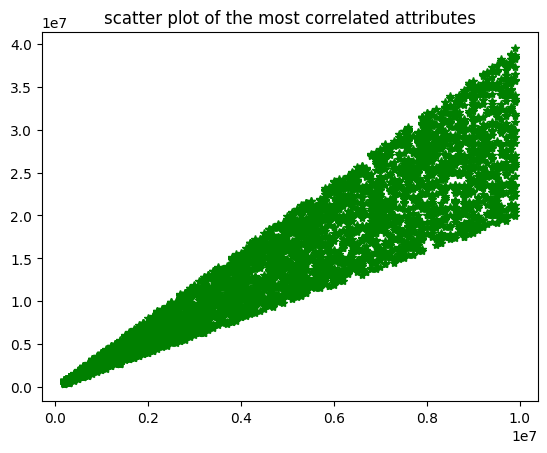

In [73]:
plt.figure()
plt.title('scatter plot of the most correlated attributes')
plt.plot(df.income_annum,df.loan_amount,'*g')

#### Probability distribution 
In the provided code, I analyzed the distribution of 3 numeric variables (income_annum, loan_amount and cibol_score) assuming independence between the features. For each of these variables, I proposed a probability distribution that best models them, using the normal distribution.

In particular:

For each variable, the mean value (average) and the standard deviation were calculated using the norm.fit() method, which fits the parameters of the normal distribution to the data.
The parameters obtained (mean and standard deviation) were stored in a distributions dictionary, with the variable name as the key and a tuple containing the parameters as the value.

In [74]:
features = ['income_annum', 'loan_amount', 'cibil_score']  

distributions = {}

for feature in features:
    mean, std = norm.fit(df[feature])
    distributions[feature] = (mean, std)



#### Modeling distributions for numeric attributes
I used the distribution of point p) to create a suitable class of objects that model a synthetic record composed of the 3 features analyzed above but created randomly

In [75]:
class SyntheticRecord:
    def __init__(self, distributions):
        self.distributions = distributions

    def generate(self):
        record = {feature: np.random.normal(mean, std)
                  for feature, (mean, std) in self.distributions.items()}
        return record


#### Generating a synthetic dataset
using the class in q) I created a new synthetic dataset with 1000 instances and produced some summary statistics for it.

In [76]:
synthetic_dataset_generator = SyntheticRecord(distributions)
new_synthetic_data_set = pd.DataFrame([synthetic_dataset_generator.generate() for _ in range(1000)])
print("Summary statistics of the new dataset:\n", new_synthetic_data_set.describe())

Summary statistics of the new dataset:
        income_annum   loan_amount  cibil_score
count  1.000000e+03  1.000000e+03  1000.000000
mean   5.174374e+06  1.491180e+07   603.108711
std    2.772748e+06  8.767601e+06   174.914850
min   -4.779975e+06 -1.080130e+07   -79.303607
25%    3.328705e+06  9.030491e+06   487.918795
50%    5.117830e+06  1.482145e+07   599.873511
75%    7.043644e+06  2.112771e+07   720.930019
max    1.428991e+07  4.182509e+07  1084.876953
